In [5]:
from datascience import *
import numpy as np

def tvd(a, b):
  # Assumes a, b are numpy arrays
  return sum(abs(a-b))/2
  
null_distribution = make_array(1/3, 1/3, 1/3)
observed_distribution = make_array(250/750, 300/750, 200/750)
observed_tvd = tvd(null_distribution, observed_distribution)

oh_slots = ["11-12", "12-1", "1-2"]

num_trials = 10000
sampled_tvds = make_array()

for i in np.arange(num_trials):
    students = np.random.choice(oh_slots, 750) # Samples uniformly at random from oh_slots 750 times
  
  # The following three variables are the proportions for each of the three time slots
  
    eleven_twelve = np.count_nonzero(students == "11-12")/750
    twelve_one = np.count_nonzero(students == "12-1")/750
    one_two = np.count_nonzero(students == "1-2")/750

    # Finds the TVD of the current sample and the null distribution – this is our test statistic
    current_tvd = tvd(make_array(eleven_twelve, twelve_one, one_two), null_distribution)

    sampled_tvds = np.append(sampled_tvds, current_tvd)

# sampled_tvds is now an array with num_trials (10000) elements, each of which is a TVD of a sample
# We now need to count the number of times these sampled TVDs were >= observed_tvd, and divide by num_trials

p_value = np.count_nonzero(sampled_tvds >= observed_tvd) / num_trials

In [6]:
p_value

0.0002

In [7]:
observed_tvd

0.06666666666666668

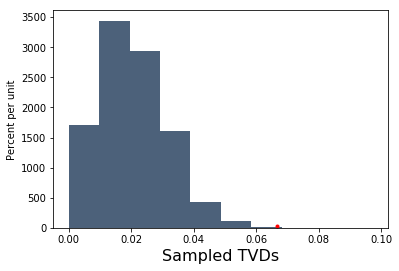

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline
Table().with_column("Sampled TVDs", sampled_tvds).hist()
plt.plot([observed_tvd], [0.3], marker='o', markersize=3, color="red")